In [1]:
import urllib
import sys
from os import mkdir, rmdir, path
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy import linalg

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.display import display, Markdown

/home/antoine/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Exercice 1. (Expérience de Galton)


1) Récupérer les données du fchier http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt et charger les
avec Pandas. On utilisera read_csv pour cela et on transformera les tailles en cm 2
, en
arrondissant sans chiffre après la virgule.


In [2]:
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'Galton.txt'
Location = url + filename

# testing existence of file:

if sys.version_info >= (3, 0):
    if not(path.isfile('filename')):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile('filename')):
        urllib.urlretrieve(Location, filename)

In [3]:
# Detect and count lines with missing values.

fields = ["Family", "Father", "Mother", "Gender","Height","Kids"]
df = pd.read_csv(filename, sep='\t', usecols=fields)

df["Height"] = df["Height"].apply(lambda x : int(round(x*2.54)))

df["Father"] = df["Father"].apply(lambda x : int(round(x*2.54)))

df["Mother"] = df["Mother"].apply(lambda x : int(round(x*2.54)))

2) Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les
lignes ayant des données manquantes.

In [4]:
count = df.isnull().values.sum()

if count ==0:
    print("Il n'y a pas de valeurs manquantes")
else:
    print("Il y a %d valeurs manquantes"%count)

Il n'y a pas de valeurs manquantes


In [5]:
#Affichage du dataframe
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199,170,M,186,4
1,1,199,170,F,176,4
2,1,199,170,F,175,4
3,1,199,170,F,175,4
4,2,192,169,M,187,4


3) Afficher sur un même graphe un estimateur de la densité (on utilisera une méthode à
noyaux avec un noyau gaussien) de la taille des pères en bleu, et de celles des mères en
orange.

<IPython.core.display.Javascript object>


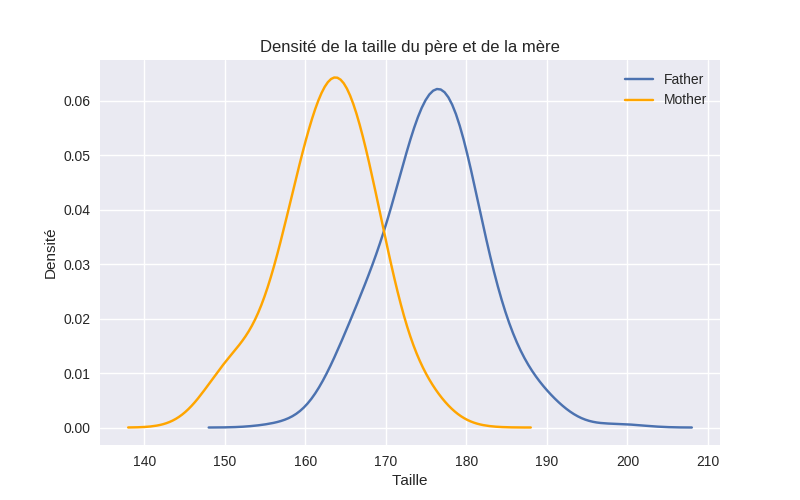

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('whitegrid')
sns.kdeplot(df['Father'],bw = 3)
sns.kdeplot(df['Mother'], bw = 3, color='orange')
plt.xlabel("Taille")
plt.ylabel("Densité")
plt.title("Densité de la taille du père et de la mère")
plt.show()

4) Afficher la taille du père en fonction de la taille de la mère pour les n observations figurant dans les données. Ajouter la droite de prédiction obtenue par la méthode des moindres carrés (avec constante et sans centrage/normalisation).

<IPython.core.display.Javascript object>


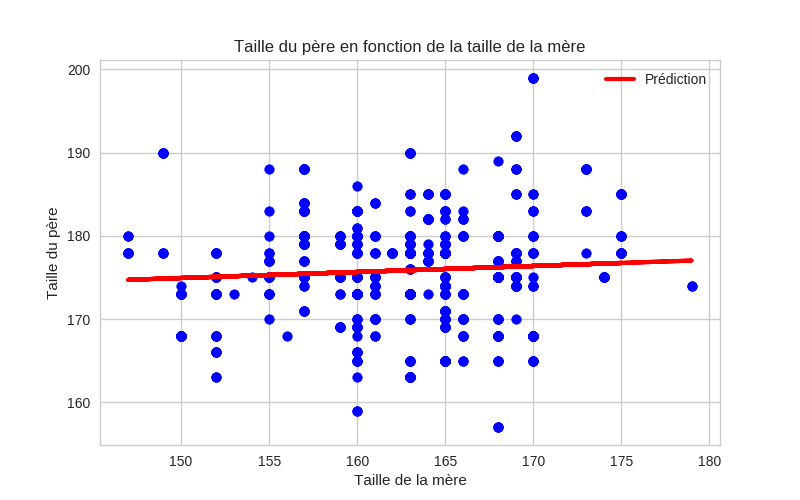

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
x = df['Mother'][:,np.newaxis]
y = df['Father']

reg_fam0 = linear_model.LinearRegression()
reg_fam0.fit(x,y)

plt.scatter(x, y,color='b')
plt.plot(x, reg_fam0.predict(x),color='r',linewidth=3)
plt.xlabel("Taille de la mère")
plt.ylabel("Taille du père")
plt.title("Taille du père en fonction de la taille de la mère")
plt.legend(["Prédiction"])
plt.show()

5) Afficher un histogramme du nombre d'enfants par famille.

<IPython.core.display.Javascript object>


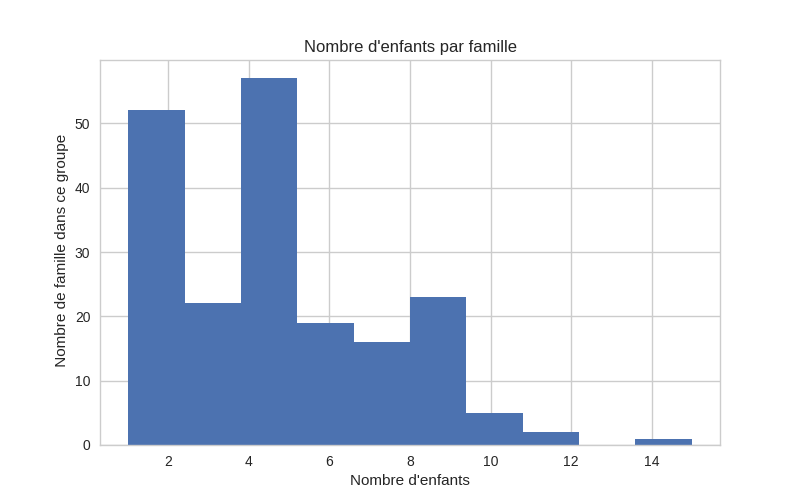

In [8]:
df_kid_fam = df.groupby("Family").size()

fig, ax = plt.subplots(figsize=(8,5))
plt.hist(df_kid_fam)
plt.xlabel("Nombre d'enfants")
plt.ylabel(" Nombre de famille dans ce groupe")
plt.title("Nombre d'enfants par famille")

plt.show()

6) Créer une colonne supplémentaire appelée 'MidParents' qui contient la taille du "parent moyen", et valant ('Father'+ 1.08 * 'Mother')/2.

In [9]:
df['Midparents'] = (df['Father']+ 1.08 * df['Mother'])/2

df.head()

,Family,Father,Mother,Gender,Height,Kids,Midparents
0,1,199,170,M,186,4,191.30
1,1,199,170,F,176,4,191.30
2,1,199,170,F,175,4,191.30
3,1,199,170,F,175,4,191.30
4,2,192,169,M,187,4,187.26


7) Estimer $\theta_0 , \theta_1$  par $\hat \theta_0 , \hat \theta_1$ en utilisant la fonction LinearRegression de sklearn, puis vérifier numériquement 3 les formules vues en cours pour le cas unidimensionnel :
$\hat \theta_0 = \bar y_n - \hat \theta_1\bar x_n$ ; 
$\mathcal \Large \hat \theta_1 = \frac{\sum_{i=1}^n (x_i - \bar x_n)(y_i - \bar y_n)}{\sum_{i=1}^n (x_i - \bar x_n)^2}$

In [10]:
#Estimation de Y "taille des enfants" par X "taille moyenne des parents"
X = df['Midparents'][:,np.newaxis]
Y = df['Height']

reg_fam = linear_model.LinearRegression()
reg_fam.fit(X,Y)

theta1 = reg_fam.coef_[0]
theta0 = reg_fam.intercept_

#On affiche les Thetas
print(display(Markdown("$\hat\\theta_0$ = {:.2f} , $\hat\\theta_1$ = {:.2f}".format(theta0,theta1))))

$\hat\theta_0$ = 58.26 , $\hat\theta_1$ = 0.63

None


In [11]:
#Calcul des moyennes et des variances de X et Y
Y_mean = Y.mean()
X_mean = X.mean()

Y_var = Y.var()
X_var = X.var()

Calculons les deux formules suivantes :

$Formula_1 = \bar y_n - \hat \theta_1\bar x_n$

$Formula_2 = \frac{\sum_{i=1}^n (x_i - \bar x_n)(y_i - \bar y_n)}{\sum_{i=1}^n (x_i - \bar x_n)^2}$

In [12]:
#Calcul de la première equation
formula1 = Y_mean - theta1*X_mean
print(formula1)

58.255916588


In [13]:
#Calcul de la seconde equation
formula2 = ((X-X_mean).transpose().dot(Y-Y_mean)/(X-X_mean).transpose().dot(X-X_mean))[0,0]
print(formula2)

0.633093766663


In [14]:
#Verification de l'égalité à une décimale près:
if np.isclose(theta0,formula1, atol=0.1):
    print ("Formula1 = theta_0 = %f"%theta0)

if np.isclose(theta1,formula2, atol=0.1):
    print ("Formula2 = theta_1 = %f"%theta1)

Formula1 = theta_0 = 58.255917
Formula2 = theta_1 = 0.633094


Les équations sont bien vérifiées

8) Calculer et visualiser les valeurs prédites yˆi et les yi sur un même graphique.
On affichera de couleurs diférentes les données correspondant aux garçons et celles correspondant
aux filles.

In [11]:
#On calcul les valeurs prédites de la taille des enfants en fonction de la taille moyenne des parents:
df["Height_hat"] = df["Midparents"].apply(lambda x : reg_fam.predict(x)[0])

df.head()

,Family,Father,Mother,Gender,Height,Kids,Midparents,Height_hat
0,1,199,170,M,186,4,191.30,179.366754
1,1,199,170,F,176,4,191.30,179.366754
2,1,199,170,F,175,4,191.30,179.366754
3,1,199,170,F,175,4,191.30,179.366754
4,2,192,169,M,187,4,187.26,176.809055


<IPython.core.display.Javascript object>


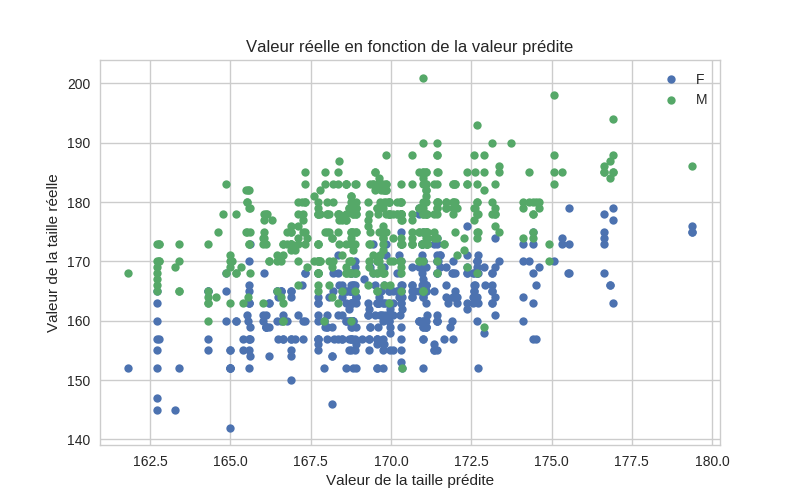

In [12]:
data = (df[df["Gender"]=="M"], df[df["Gender"]=="F"])
groups = df.groupby('Gender')

fig, ax = plt.subplots(figsize=(8,5))

for name, group in groups:
    ax.plot(group.Height_hat, group.Height, marker='o', linestyle='', ms=6, label=name)
ax.legend()
plt.xlabel("Valeur de la taille prédite")
plt.ylabel("Valeur de la taille réelle")
plt.title("Valeur réelle en fonction de la valeur prédite")


plt.show()

9) Visualiser un estimateur de la densité des résidus ri. L'hypothèse de normalité
est-elle crédible selon vous ? Calculer ensuite les proportions de garçons et de filles dans la population. On ajoutera ensuite sur le graphique précédent, les fonctions des densités des résidus pour les garçons et pour les filles.

In [13]:
#On ajoute une colonne qui calcul les valeurs résidus
df["Residuals"] = df["Height"] - df["Height_hat"]

df.head()

,Family,Father,Mother,Gender,Height,Kids,Midparents,Height_hat,Residuals
0,1,199,170,M,186,4,191.30,179.366754,6.633246
1,1,199,170,F,176,4,191.30,179.366754,-3.366754
2,1,199,170,F,175,4,191.30,179.366754,-4.366754
3,1,199,170,F,175,4,191.30,179.366754,-4.366754
4,2,192,169,M,187,4,187.26,176.809055,10.190945


<IPython.core.display.Javascript object>


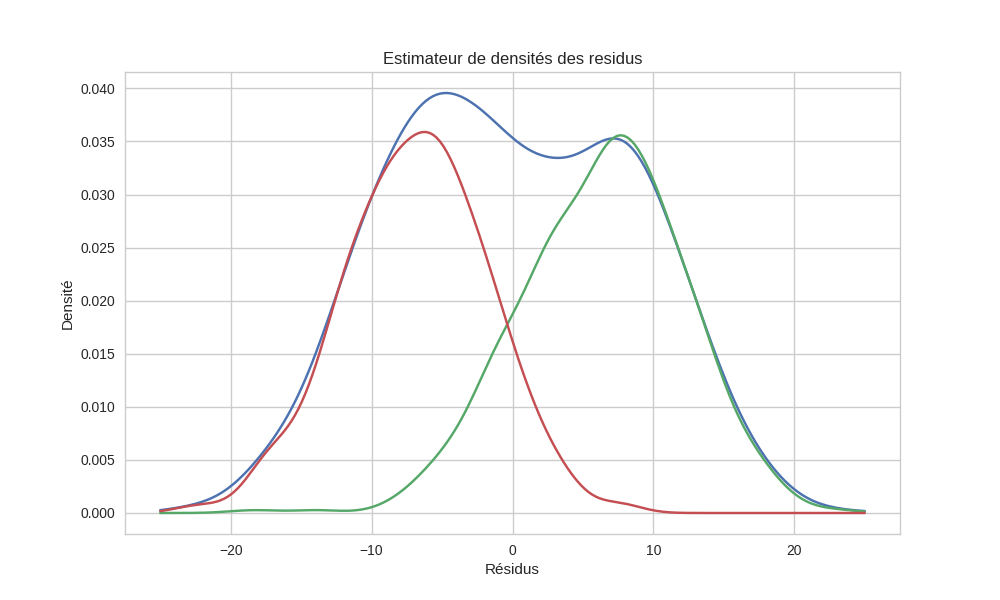

In [14]:
#Calcul des proportions de fille et de garçon
alpha_fem = df.groupby('Gender').size()["F"]/float(len(df))
alpha_male = df.groupby('Gender').size()["M"]/float(len(df))

fig = plt.figure(figsize=(10, 6))
#distrubutions totale, filles et garçons.
kde_male = gaussian_kde(df[df['Gender']=="M"]["Residuals"])
kde_fem = gaussian_kde(df[df['Gender']=="F"]["Residuals"])
kde_pop = gaussian_kde(df["Residuals"])
x = np.linspace(-25.0, 25.0, num=200)

#affichages
plt.plot(x, kde_pop(x), x, alpha_male*kde_male(x), x, alpha_fem*kde_fem(x))
plt.title('Estimateur de densités des residus')
plt.xlabel("Résidus")
plt.ylabel("Densité")
plt.show()

10) Régresser cette fois les xi sur les yi (et non plus les yi sur les xi). On veut comparer
numériquement les coeffcients αˆ0 et αˆ1 ainsi obtenus par rapport aux ˆθ0 et ˆθ1 du modèle
original. Vérifier numériquement que :


In [15]:
X2 = df['Midparents']
Y2 = df['Height'][:,np.newaxis]

reg_fam2 = linear_model.LinearRegression()
reg_fam2.fit(Y2,X2)

alpha1 = reg_fam2.coef_[0]
alpha0 = reg_fam2.intercept_

#On affiche les Thetas
print(display(Markdown("$\hat\\alpha_0$ = {:.2f} , $\hat\\alpha_1$ = {:.2f}".format(alpha0,alpha1))))

$\hat\alpha_0$ = 148.44 , $\hat\alpha_1$ = 0.16

None


In [20]:
#Calcul de la première équation :
formula3 = X_mean + ((Y_mean/X_mean)*(X_var/Y_var))*(theta0 - Y_mean)

In [21]:
#Calcul de la seconde équation :
formula4 = (X_var/Y_var)*theta1

In [22]:
#Verification de l'égalité à une décimale près:
if np.isclose(alpha0,formula3, atol=0.1):
    print ("Formula3 = alpha0 = %f"%alpha0)

if np.isclose(alpha1,formula4, atol=0.1):
    print ("Formula4 = alpha1 = %f"%alpha1)

Formula3 = alpha0 = 148.437160
Formula4 = alpha1 = 0.161490


Les équations sont bien vérifiées.

# Exercice 2. (Analyse du jeu de données auto-mpg)

11) Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original. On ajoutera le nom des colonnes en consultant l'adresse : https://archive.ics.uci.edu/ml/machinelearning-databases/auto-mpg/auto-mpg.names avec l'attribut 'name' de read_csv. On
pourra regarder l'intérêt de l'option sep=r"\s+" si besoin. Y a-t-il un marqueur utilisé pour
les données manquantes dans le fichier utilisé ? Si besoin, enlever les lignes possédant des
valeurs manquantes dans la base de données.

In [16]:
na_values = ["NA"] 
fields = ["mpg","cylinders","displacement", "horsepower","weight","acceleration","model year","origin","car name"]
path = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
df_car = pd.read_csv(path,na_values=na_values, sep=r"\s+", names=fields)

In [17]:
df_car[df_car.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


Il y a bien des valeurs nulles.

In [18]:
#on supprime les Na
df_car = df_car.dropna()
df_car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


12) Calculer l'estimateur des moindres carrés θˆ (avec ordonnée à l'origine) et sa prédiction yˆ
sur une sous partie de la base obtenue en gardant les 9 premières lignes. Que constatez-vous
pour les variables cylinders et model year ?

In [19]:
df_car_sample = df_car[:9]

# X sans,"origin","car name"]
Y_samp = df_car_sample['mpg']
X_samp = df_car_sample[["cylinders","displacement", "horsepower","weight","acceleration","model year"]]

reg_car_sample = linear_model.LinearRegression(fit_intercept=True)
reg_car_sample.fit(X_samp,Y_samp)

#Affichage des résultats dans un Dataframe
coef_samp = pd.DataFrame(list(zip(X_samp.columns,reg_car_sample.coef_)),columns=["feature","theta"])
coef_samp

,feature,theta
0,cylinders,0.000000
1,displacement,0.054088
2,horsepower,-0.094531
3,weight,-0.004241
4,acceleration,-0.199367
5,model year,0.000000


Les valeurs des estimateurs des cylindrés et des années de modèle sont nulles. En effet, pour cet echantillon toutes les valurs sont les mêmes.

13) Calculer θˆ et yˆ cette fois sur l'intégralité des données, après les avoir centrées et réduites.
Quelles sont les deux variables qui expliquent le plus la consommation d'un véhicule ?

In [27]:
# X sans,"origin","car name"]
Y = df_car['mpg']
X = df_car[["cylinders","displacement", "horsepower","weight","acceleration","model year"]]

In [28]:
X_scaled = StandardScaler().fit_transform(X)

reg_car = linear_model.LinearRegression()

reg_car.fit(X_scaled,Y)

#Affichage des résultats dans un Dataframe
coef_car = pd.DataFrame(list(zip(X.columns,reg_car.coef_)),columns=["feature","theta"])
coef_car

,feature,theta
0,cylinders,-0.561950
1,displacement,0.802476
2,horsepower,-0.015045
3,weight,-5.764000
4,acceleration,0.234957
5,model year,2.771664


L'année du modèle et le poids de la voiture sont les variables les plus influentes.

14) Calculer le carré de la norme du vecteur des résidus, puis r2/(n-p). Vérifier
numériquement l'équation.

In [29]:
Y_hat = reg_car.predict(X_scaled)
r2 = (np.linalg.norm(Y-Y_hat)**2)

print(r2)

4543.34702471


In [30]:
n, p =X.shape
print( "n : "+str(n))
print( "p : "+str(p))

n : 392
p : 6


In [31]:
print (r2/(n-p))

11.7703290796


In [32]:
Y_mean = Y.mean()

#Calcul des deux termes de l'équation demandé
T1 = np.linalg.norm(Y-Y_mean*np.ones(n))**2
T2 = r2 + np.linalg.norm(Y_hat - (Y_mean*np.ones(n)))**2

print (T1,T2)

print (np.allclose(T1,T2))

23818.9934694 23818.9934694
True


On constate que les deux termes sont bien égaux.

15) Supposons que l'on vous fournisse les caractéristiques suivantes d'un nouveau véhicule. Prédire sa consommation.

In [22]:
new_point = np.array([6.0, 225.0, 100.0, 3233.0, 15.4, 76.0]).reshape(1,-1)
StandardScaler().fit_transform(new_point)

array([[ 0.,  0.,  0.,  0.,  0.,  0.]])

In [33]:
new_point = np.array([6.0, 225.0, 100.0, 3233.0, 15.4, 76.0]).reshape(1,-1)

new_point_scaled = StandardScaler().fit_transform(new_point)
Y_new_point = reg_car.predict(new_point_scaled)

print("Le modele prédit une consommation pour ce vehicule de : "+str(Y_new_point[0]))

Le modele prédit une consommation pour ce vehicule de : 23.4459183673


16) Utiliser la transformation PolynomialFeatures de sklearn sur les données brutes, pour
ajuster un modèle d'ordre deux (avec les termes d'interactions : interaction_only=False).
On normalisera et recentrera après avoir créé les nouvelles variables explicatives. Quelle est
alors la variable la plus explicative de la consommation ?

In [34]:
#On applique PlynomialFeatures de scikit learn
poly = PolynomialFeatures(interaction_only=False)
X2 = poly.fit_transform(X)
X_scaled2 = StandardScaler().fit_transform(X2)

reg_car_int = LinearRegression()
reg_car_int.fit(X_scaled2, Y)

#On récupère les noms des variables avec intéractions
columns = ["cylinders","displacement", "horsepower","weight","acceleration","model year"]
features_int = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0])
                        for tuple in [zip(columns,p) for p in poly.powers_]]

#Affichage des résultats dans un Dataframe
coef_int = pd.DataFrame(list(zip(features_int,reg_car_int.coef_)),columns=["features_int","coefficients"]).replace('',"Constant")
coef_int

,features_int,coefficients
0,Constant,-8.632404e+13
1,cylinders^1,7.295570e+01
2,displacement^1,-5.297107e+01
3,horsepower^1,-3.214603e+01
4,weight^1,-4.107961e+00
5,acceleration^1,-1.166771e+00
6,model year^1,-4.944678e+01
7,cylinders^2,1.260704e+00
8,cylinders^1xdisplacement^1,-1.670368e+01
9,cylinders^1xhorsepower^1,-2.547798e+01


La variable la plus explicative est la variable "cylindre" seule.

17) On revient ici au modèle sans interactions. Proposer une manière de gérer la variable
origin, par exemple avec pd.get_dummies. On ajustera un modèle linéaire sans constante
dans ce cas. Déterminer laquelle des trois origines est la plus efficace en terme de consommation.

In [35]:
#Transformation des codes
df_car['origin'] = df_car['origin'].replace({1: 'Usa', 2: 'Europe', 3: 'Japan'})

#Application de get_dummies
df_car_dum = pd.get_dummies(df_car, columns= ["origin"], prefix='origin')

df_car_dum.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_Europe,origin_Japan,origin_Usa
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,0,0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,0,0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,0,0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,0,0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,0,0,1


In [36]:
#Séléction des variables sans,"origin","car name"]
Y = df_car_dum['mpg']
X_dum = df_car_dum[["cylinders","displacement", "horsepower","weight","acceleration","model year", 'origin_Europe',
       'origin_Japan', 'origin_Usa']]

#Centré réduire nos features

X_dum_scaled = StandardScaler().fit_transform(X_dum)

reg_car_dum = linear_model.LinearRegression(fit_intercept=False)
reg_car_dum.fit(X_dum_scaled,Y)

#affichage des coefficients par variable
coef_dum1 = pd.DataFrame(list(zip(X_dum.columns,reg_car_dum.coef_)),columns=["feature","theta"])
coef_dum1

,feature,theta
0,cylinders,-0.834272
1,displacement,2.506019
2,horsepower,-0.699009
3,weight,-5.692543
4,acceleration,0.217956
5,model year,2.858709
6,origin_Europe,0.408048
7,origin_Japan,0.521830
8,origin_Usa,-0.751539


On constate que les voitures originaire du Japon sont beaucoup plus économiques. Car le coefficient origin_Japan est le plus élevé. On fait donc plus de miles avec une voiture japonnaise.

18) Procéder comme pour la question précédente, mais cette fois pour mesurer l'influence
de la marque de la voiture. On ne considère ici que les variables 'cylinders',
'displacement','horsepower', 'weight', 'acceleration', 'model year' en plus de la
marque. On pourra utiliser str.split, str.replace et get_dummies.

In [37]:
#Nettoyage du datframe pour avoir la marque de la voiture
df_car["brand"] = df_car["car name"].apply(lambda x : x.split(" ")[0])

car_dic = {"chevroelt" : "chevrolet","chevy" : "chevrolet", "toyouta":"toyota","mercedes-benz":"mercedes","maxda":"mazda"
        ,"vw":"volkswagen", "vokswagen": "volkswagen"}

df_car = df_car.replace({"brand": car_dic})

#On applique get_dummies aux marques
df_car_dum2 = pd.get_dummies(df_car, columns= ["brand"], prefix='brand_is')

Y = df_car_dum2['mpg']
X_dum2 = df_car_dum2.loc[:, df_car_dum2.columns.difference(["mpg","car name","origin"])]

X_dum2.head()

,acceleration,brand_is_amc,brand_is_audi,brand_is_bmw,brand_is_buick,brand_is_cadillac,brand_is_capri,brand_is_chevrolet,brand_is_chrysler,brand_is_datsun,...,brand_is_subaru,brand_is_toyota,brand_is_triumph,brand_is_volkswagen,brand_is_volvo,cylinders,displacement,horsepower,model year,weight
0,12.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,8.0,307.0,130.0,70.0,3504.0
1,11.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,8.0,350.0,165.0,70.0,3693.0
2,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.0,318.0,150.0,70.0,3436.0
3,12.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.0,304.0,150.0,70.0,3433.0
4,10.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.0,302.0,140.0,70.0,3449.0


In [38]:
#Application de la regression linéaire sur les variables dummies "marque".

reg_car_dum2 = linear_model.LinearRegression(fit_intercept=False)
reg_car_dum2.fit(X_dum2,Y)

#Affichage des dix premiers résultats dans un Dataframe en triant par coefficient croissant
coef_dum2 = pd.DataFrame(list(zip(X_dum2.columns,reg_car_dum2.coef_)),columns=["feature","theta"])
coef_dum2.sort_values("theta", ascending=False).head(10)

,feature,theta
34,model year,0.748239
0,acceleration,0.044589
32,displacement,0.025365
35,weight,-0.006380
33,horsepower,-0.024671
31,cylinders,-0.623057
28,brand_is_triumph,-8.012758
18,brand_is_nissan,-10.601084
9,brand_is_datsun,-10.725618
14,brand_is_honda,-11.395134


La marque "Triumph" a le theta le plus élevé, c'est donc cette marque la plus efficace en terme de consommation"

19) Reprendre la matrice X obtenue (sans variables catégorielles) question 13. Obtenir numériquement
la SVD (partielle) de X. Vérifier numériquement que H = UU(t) est une projection orthogonale.

In [39]:
#On calcule la SVD de X (centrée réduite)
U, s, Vh = linalg.svd(X_scaled, full_matrices=False)

In [40]:
#La matrice U
U

array([[-0.06264724, -0.06255195,  0.00462514,  0.10969705,  0.01330164,
         0.02425062],
       [-0.08157909, -0.05738111,  0.01425208,  0.03531237, -0.05949395,
        -0.02469533],
       [-0.07176882, -0.06686683,  0.02842546,  0.0792214 , -0.04276337,
         0.01310898],
       ..., 
       [ 0.02890433,  0.03850065,  0.13369036,  0.01367472,  0.06174893,
        -0.04384621],
       [ 0.04796795,  0.07363401, -0.00782921, -0.04999643, -0.00990061,
        -0.01267871],
       [ 0.04827607,  0.07872181, -0.02446634, -0.06834025, -0.02027867,
        -0.00338088]])

In [41]:
#La matrice Sigma
s

array([ 40.85099152,  18.14185769,  16.24023035,   7.21696359,
         4.89691307,   3.77625327])

In [42]:
#La matrice V
Vh

array([[-0.45476297, -0.46885724, -0.46365868, -0.44625213,  0.32464331,
         0.23205586],
       [ 0.18949971,  0.16303989,  0.01052532,  0.25716695,  0.22125982,
         0.90681107],
       [-0.16787927, -0.13153149,  0.12497783, -0.27008821, -0.86433834,
         0.34477262],
       [ 0.66043399,  0.18824633, -0.61826946, -0.35122423, -0.14811227,
        -0.02893841],
       [-0.27378563, -0.00119299, -0.61337637,  0.68521342, -0.27449654,
        -0.06279853],
       [ 0.46686768, -0.83716918,  0.10393605,  0.26248935, -0.03583935,
        -0.01394673]])

Une matrice P est dite une projection orthogonale sur S si Rang(P)= S, P2 = P et P(t) = P

In [43]:
# On calcule H
H = U.dot(U.transpose())

#H2 = U.transpose().dot(U)
H

array([[ 0.02065728,  0.01124934,  0.01724967, ..., -0.00234259,
        -0.01357084, -0.01591018],
       [ 0.01124934,  0.01554721,  0.01511478, ..., -0.00476984,
        -0.00911333, -0.00992747],
       [ 0.01724967,  0.01511478,  0.01870652, ..., -0.00298068,
        -0.01229243, -0.01401521],
       ..., 
       [-0.00234259, -0.00476984, -0.00298068, ...,  0.02611329,
         0.00243562, -0.00088317],
       [-0.01357084, -0.00911333, -0.01229243, ...,  0.00243562,
         0.0105426 ,  0.01196426],
       [-0.01591018, -0.00992747, -0.01401521, ..., -0.00088317,
         0.01196426,  0.01421935]])

In [44]:
#Verification si transposé de H et H au carré sont identique 
H_sq = H.dot(H)

In [45]:
#Transposé de H
H_trans = H.transpose()

In [46]:
#Vérification de l'égalité de H et H au carré
np.allclose(H,H_sq)

True

In [47]:
#Vérification de l'égalité de H et transposé de H
np.allclose(H,H_trans)

True

H est bien une projection orthogonale.

20) La diagonale de la matrice H, forme le vecteur des "leviers", qu'on ajoutera comme nouvelle
variable. Trier la base de données en fonction de cette variable, et expliquer en quoi les
voitures ayant les trois valeurs de "levier" maximales semblent atypiques.

In [48]:
#On ajoute la diagonale aux données qu'on nomme "leviers" et on trie sur celle ci.
diag = H.diagonal()

df_car["Leviers"] = diag

df_car.sort_values("Leviers", ascending=False).head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,Leviers
19,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,Usa,buick estate wagon (sw),buick,0.187359
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,Usa,hi 1200d,hi,0.084799
32,10.0,8.0,307.0,200.0,4376.0,15.0,70.0,Usa,chevy c20,chevrolet,0.061549
33,11.0,8.0,318.0,210.0,4382.0,13.5,70.0,Usa,dodge d200,dodge,0.060702
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,Usa,pontiac catalina,pontiac,0.059179


Les trois premiers points (19, 34 , 32) de données sont "atypiques" dans le sens où elles influent fortement le modèle par le fait qu'elles soient très éloignées des autres valeurs. C'est une des manières de détecter les outliers dans un jeu de données.

<IPython.core.display.Javascript object>


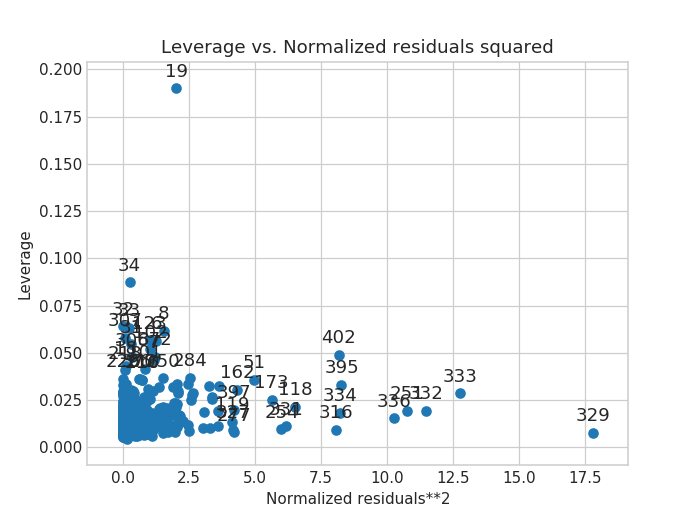

<IPython.core.display.Javascript object>


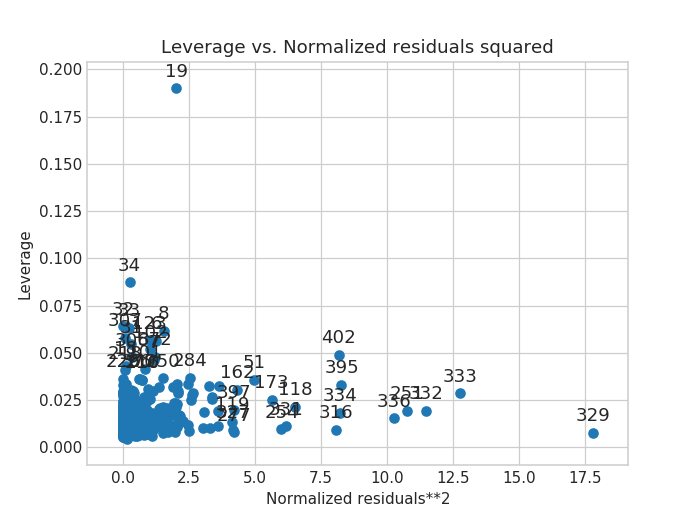

In [49]:
#Il est possible de voir l'influence de ces leviers en utilisant le graphique leverage plot de statmodels

X = sm.add_constant(X_scaled)
model = sm.OLS(Y,X)
results = model.fit()
results.params

plot_leverage_resid2(results)